## Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
data_folder = '/content/drive/MyDrive/pump_it_up'
train_values_csv = os.path.join(data_folder, 'train_set_values.csv')
train_labels_csv = os.path.join(data_folder, 'train_set_labels.csv')
test_values_csv = os.path.join(data_folder, 'test_set_values.csv')

## Load Dataset

In [ ]:
train_data = pd.read_csv(train_values_csv)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
train_labels = pd.read_csv(train_labels_csv)
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [ ]:
df = train_data.copy()
df = df.join(train_labels['status_group'])

## Feature Stats

unique value counts of geological features

In [ ]:
print("district_code:", df['district_code'].nunique())
print("region_code:", df['region_code'].nunique())
print("ward:", df['ward'].nunique())
print("lga:", df['lga'].nunique())
print("subvillage:", df['subvillage'].nunique())

district_code: 20
region_code: 27
ward: 2092
lga: 125
subvillage: 19287


In [ ]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [ ]:
(df['lga'].value_counts() < 10).sum()

1

In [ ]:
(df['ward'].value_counts() < 10).sum()

484

In [ ]:
df.groupby(['region', 'status_group']).size()

region         status_group           
Arusha         functional                 2294
               functional needs repair     175
               non functional              881
Dar es Salaam  functional                  461
               functional needs repair       3
                                          ... 
Tabora         functional needs repair      45
               non functional             1066
Tanga          functional                 1436
               functional needs repair      73
               non functional             1038
Length: 63, dtype: int64

In [ ]:
(df['funder'] == '0').sum()

777

In [ ]:
df['funder'].nunique()

1897

In [ ]:
df.groupby(['installer'])['construction_year'].mean()

installer
-                    0.000000
0                 1964.929215
A.D.B                0.000000
AAR                  0.000000
ABASIA            1988.931034
                     ...     
water board       2007.000000
wizara ya maji    1986.000000
world                0.000000
world banks       2009.000000
world vision         0.000000
Name: construction_year, Length: 2145, dtype: float64

In [ ]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [ ]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [ ]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [ ]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
df['installer'].value_counts()

DWE                  17402
Government            1825
RWE                   1206
Commu                 1060
DANIDA                1050
                     ...  
RC church/CEFA           1
Theo                     1
Mtwara Technician        1
RC mission               1
Sumry                    1
Name: installer, Length: 2145, dtype: int64

In [ ]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

## Plot features against target

In [ ]:
sns.set(rc={"figure.figsize":(15, 8)}) # width, height

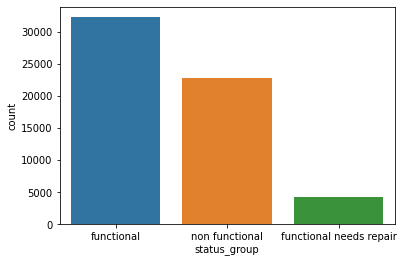

In [ ]:
sns.countplot(data=df, x="status_group")

### Categorical Plots

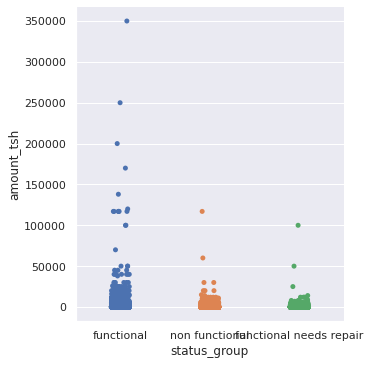

In [ ]:
sns.catplot(data=df, x='status_group', y='amount_tsh')

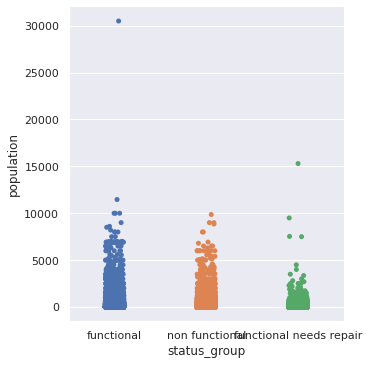

In [ ]:
sns.catplot(data=df, x='status_group', y='population')

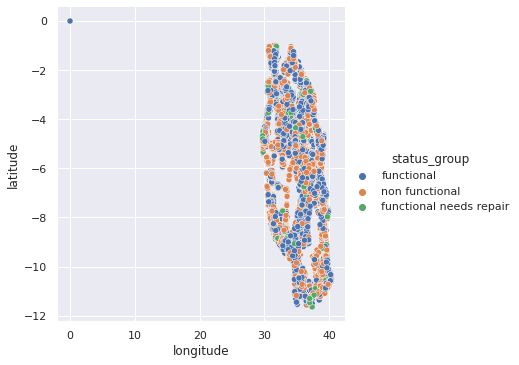

In [ ]:
sns.relplot(data=df, x='longitude', y='latitude', hue='status_group')

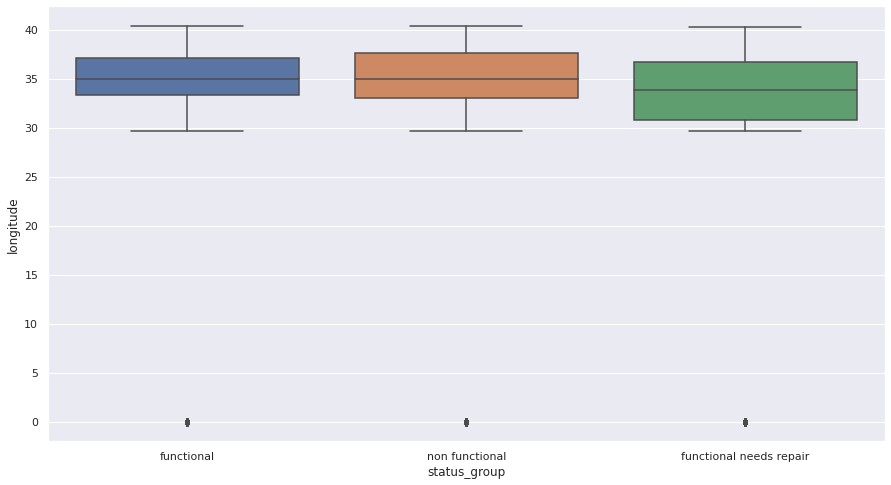

In [ ]:
sns.boxplot(data=df, x='status_group', y='longitude')

### Count Plots

geographical

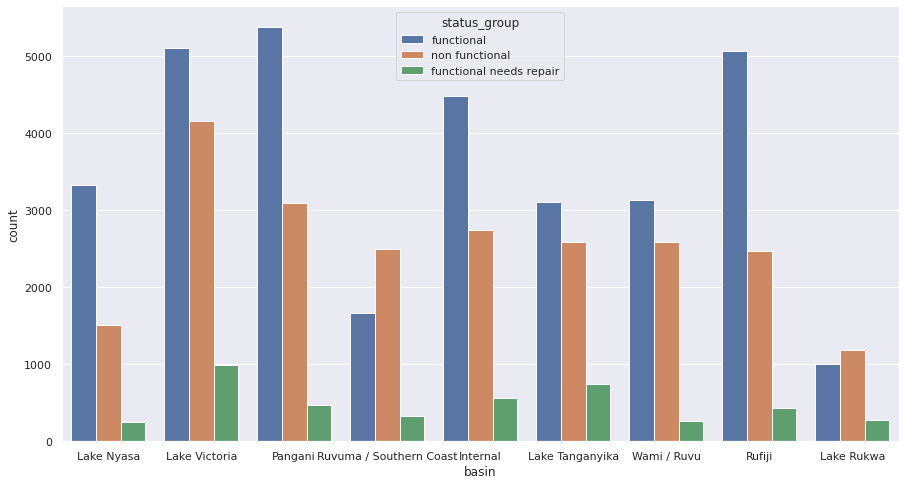

In [ ]:
sns.countplot(data=df, x='basin', hue='status_group')

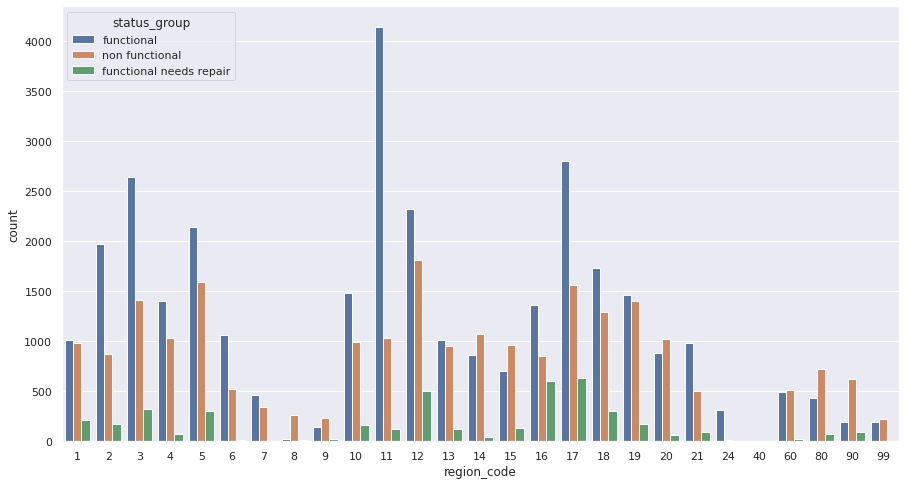

In [ ]:
sns.countplot(data=df, x='region_code', hue='status_group')

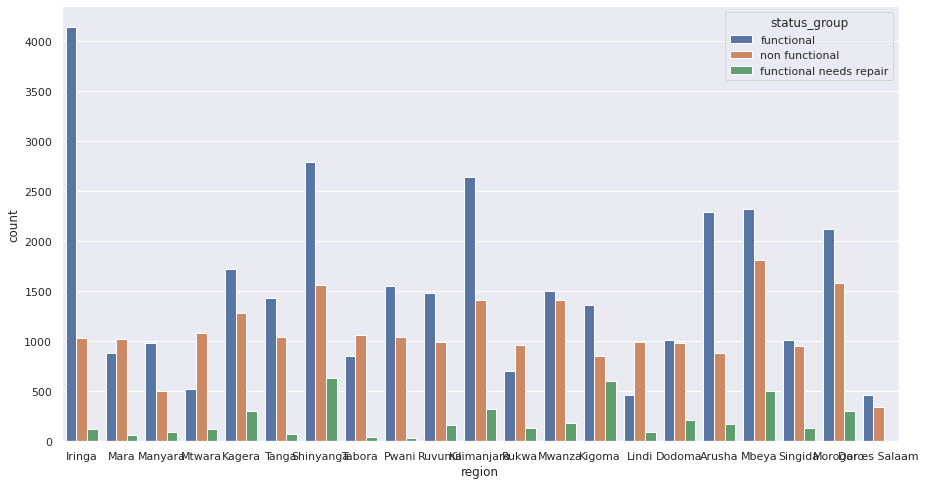

In [ ]:
sns.countplot(data=df, x='region', hue='status_group')

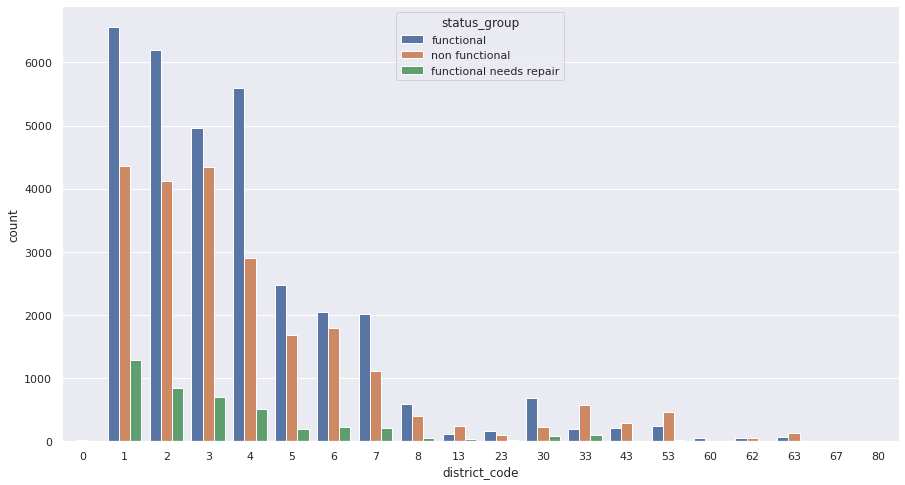

In [ ]:
sns.countplot(data=df, x='district_code', hue='status_group')

extraction type

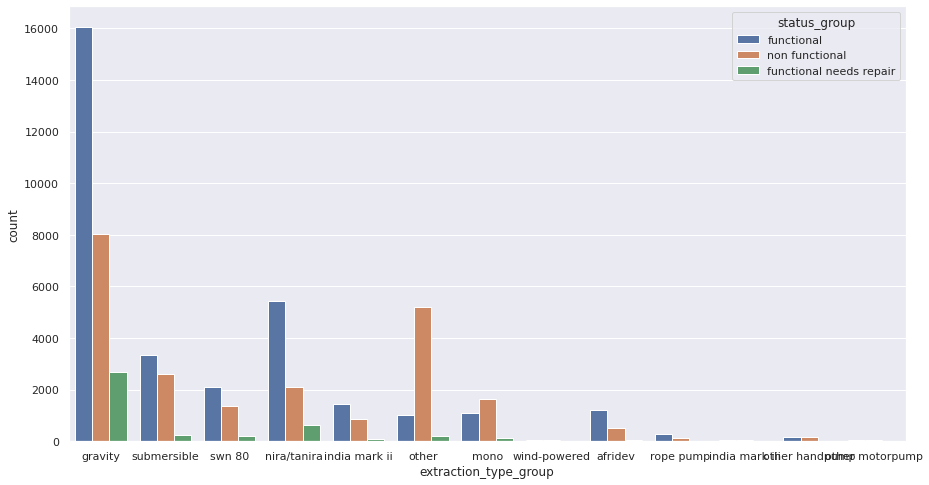

In [ ]:
sns.countplot(data=df, x='extraction_type_group', hue='status_group')

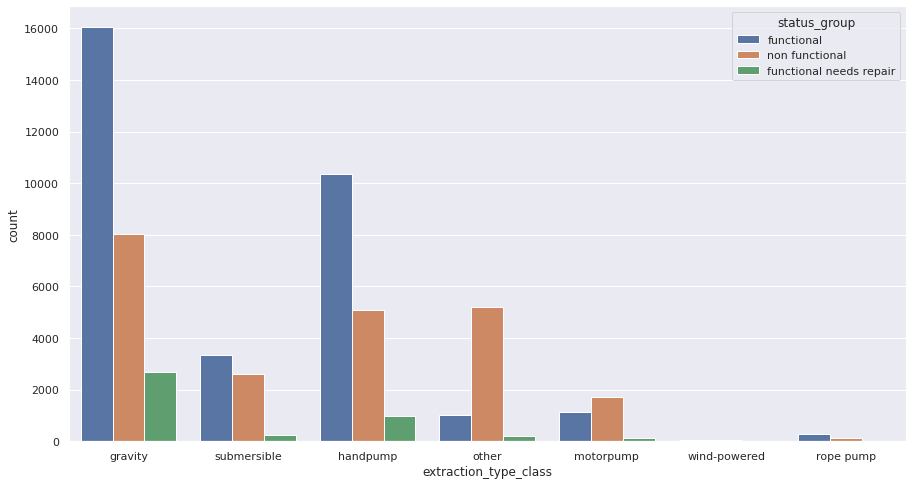

In [ ]:
sns.countplot(data=df, x='extraction_type_class', hue='status_group')

payment

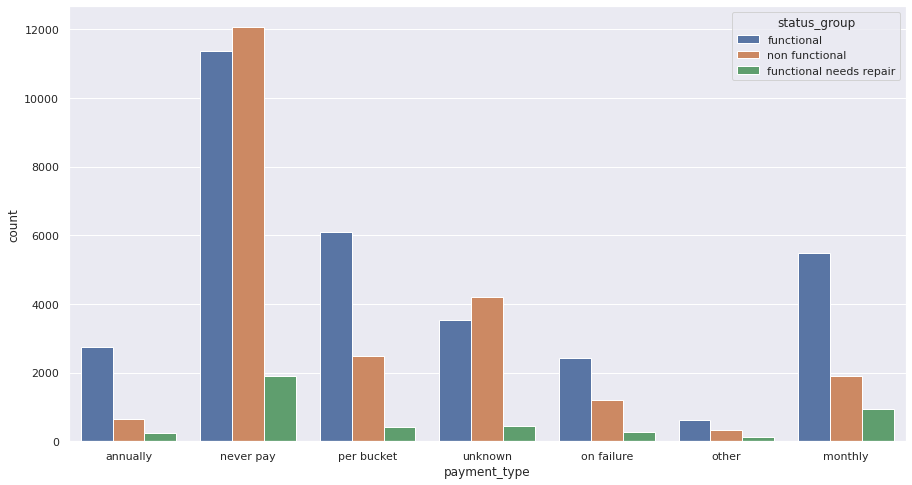

In [ ]:
sns.countplot(data=df, x='payment_type', hue='status_group')

waterpoint

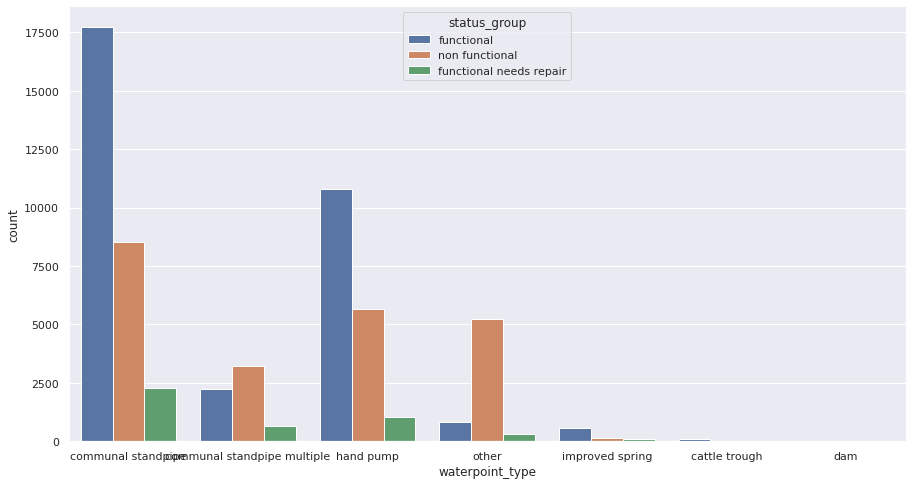

In [ ]:
sns.countplot(data=df, x='waterpoint_type', hue='status_group')

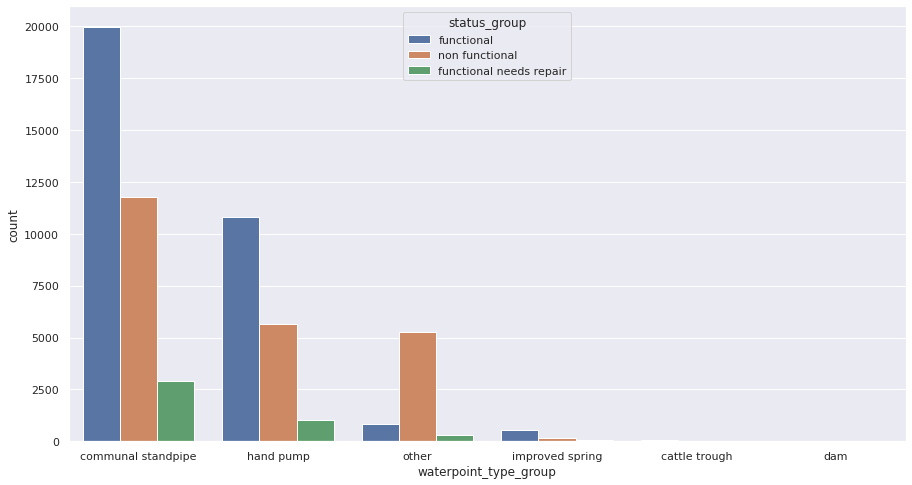

In [ ]:
sns.countplot(data=df, x='waterpoint_type_group', hue='status_group')

quantity

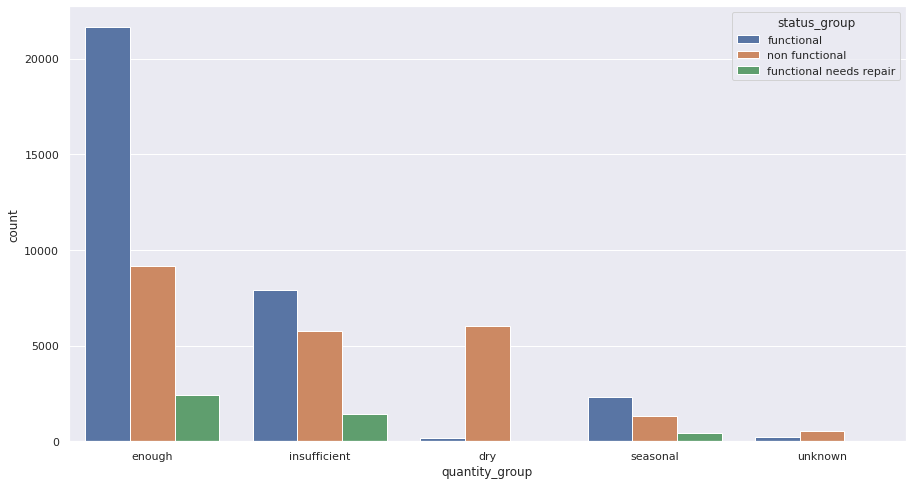

In [ ]:
sns.countplot(data=df, x='quantity_group', hue='status_group')

quality

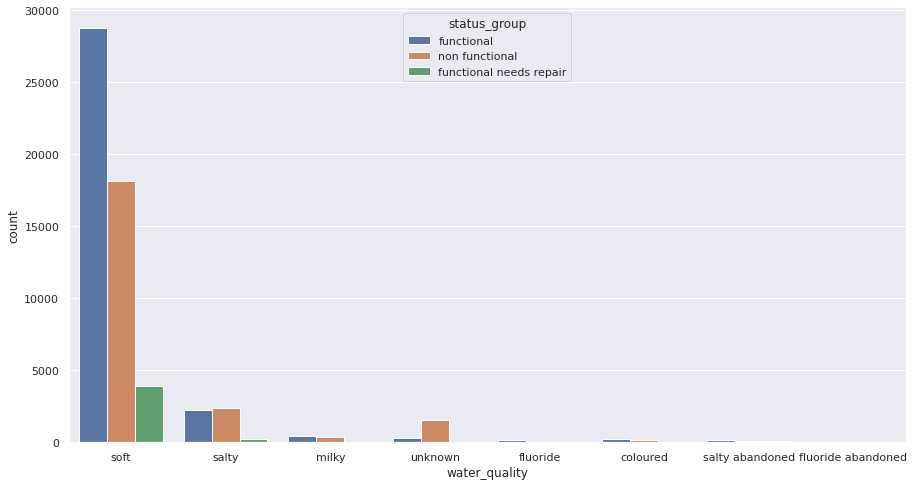

In [ ]:
sns.countplot(data=df, x='water_quality', hue='status_group')

source

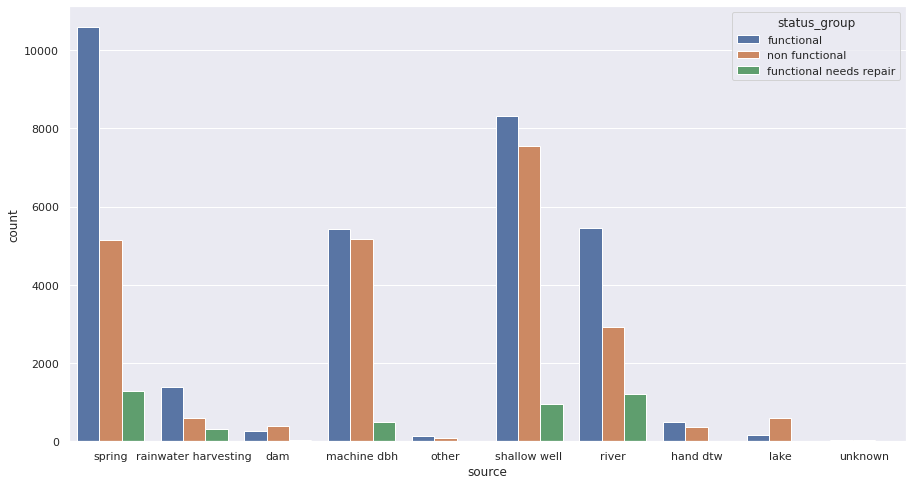

In [ ]:
sns.countplot(data=df, x='source', hue='status_group')

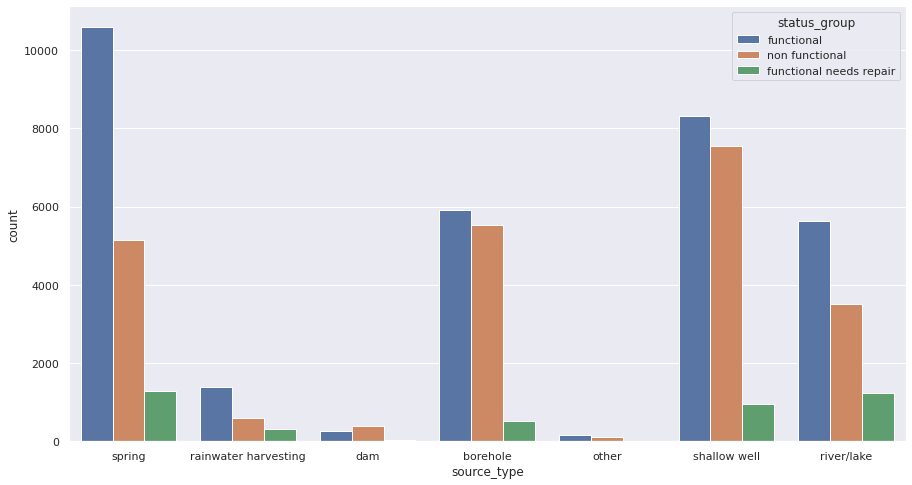

In [ ]:
sns.countplot(data=df, x='source_type', hue='status_group')

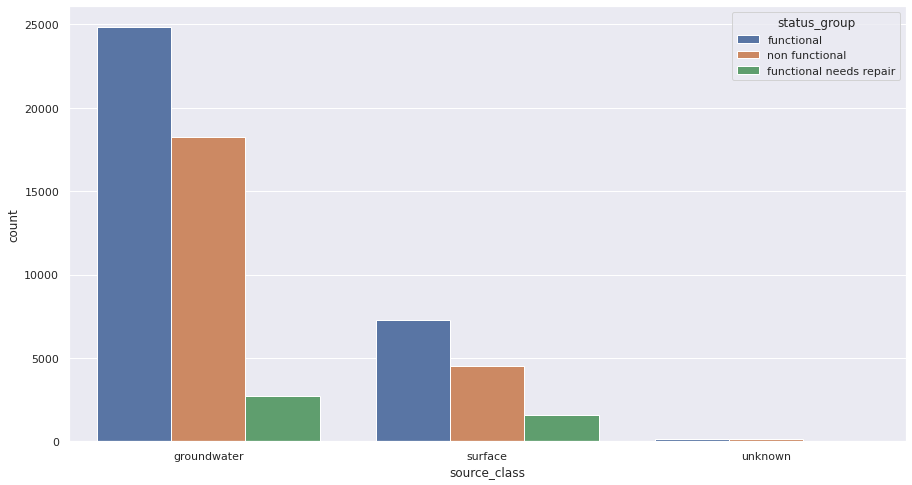

In [ ]:
sns.countplot(data=df, x='source_class', hue='status_group')

management

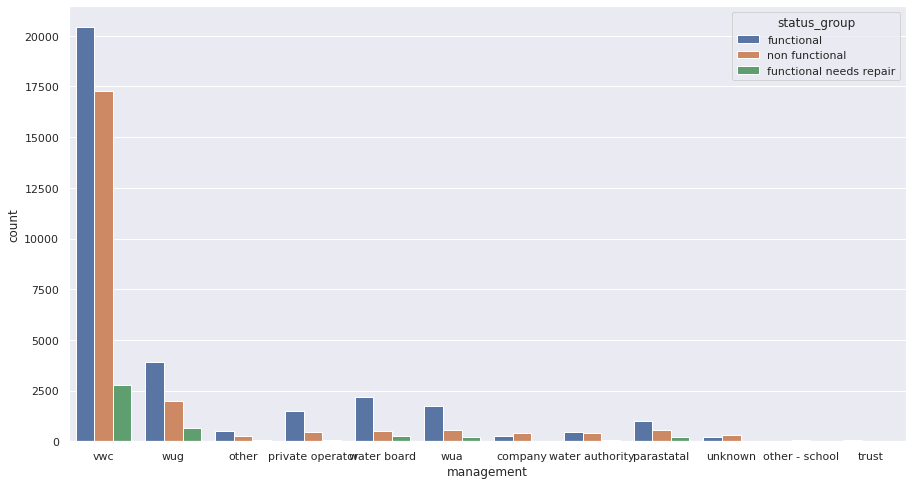

In [ ]:
sns.countplot(data=df, x='management', hue='status_group')

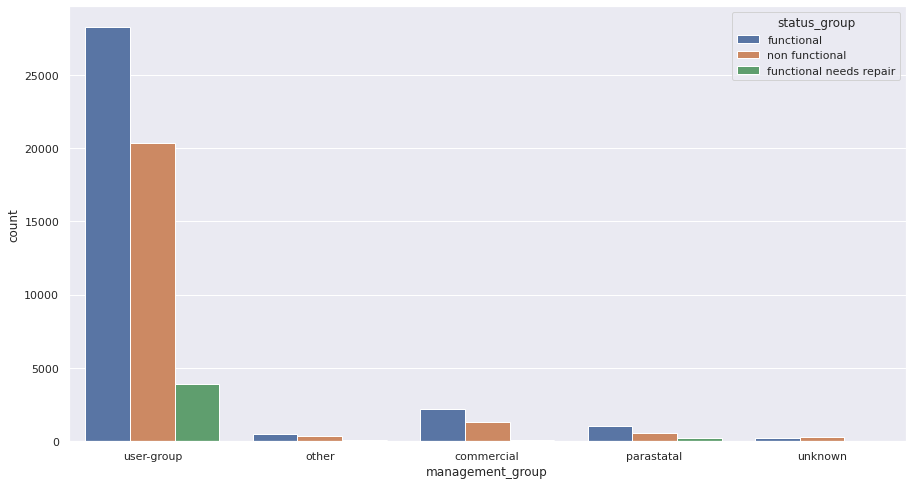

In [ ]:
sns.countplot(data=df, x='management_group', hue='status_group')

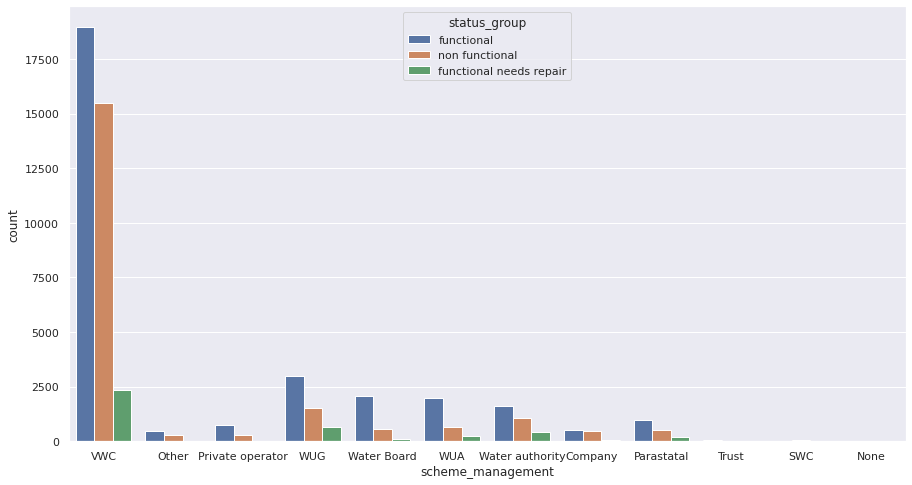

In [ ]:
sns.countplot(data=df, x='scheme_management', hue='status_group')

boolean

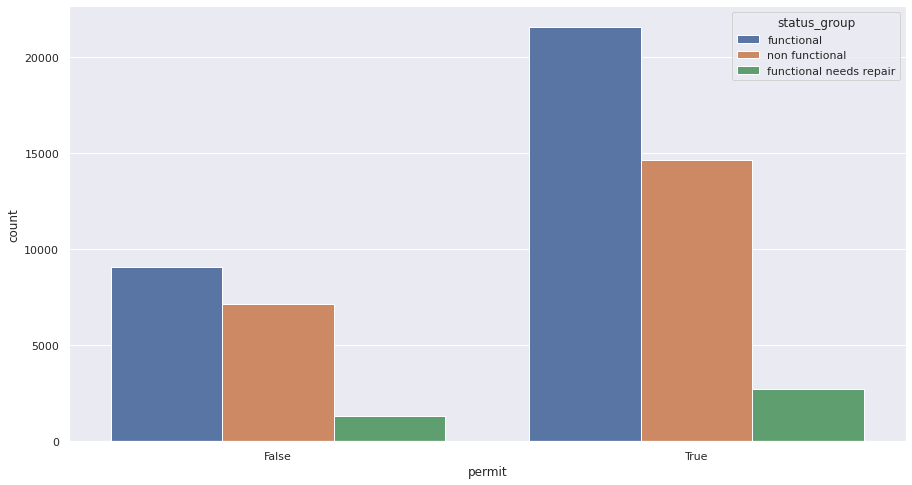

In [ ]:
sns.countplot(data=df, x='permit', hue='status_group')

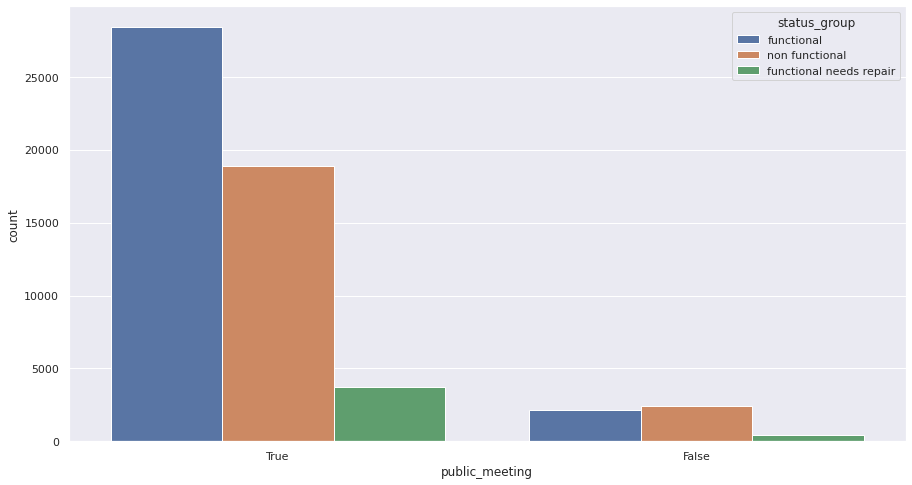

In [ ]:
sns.countplot(data=df, x='public_meeting', hue='status_group')

### Distribution Plots

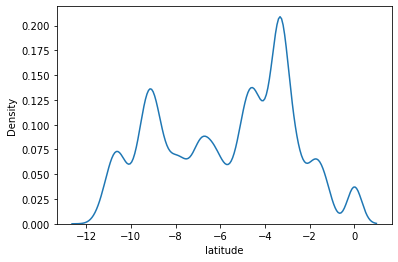

In [ ]:
sns.kdeplot(data=df, x='latitude')  # should be between -12 and 0 according to world map

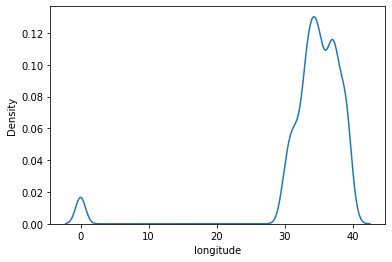

In [ ]:
sns.kdeplot(data=df, x='longitude')   # should be between 29 and 40 according to world map

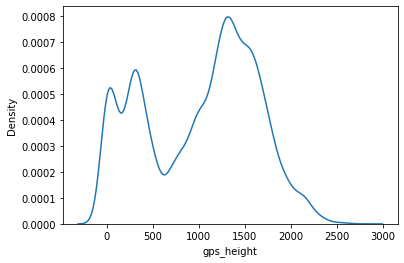

In [ ]:
sns.kdeplot(data=df, x='gps_height')

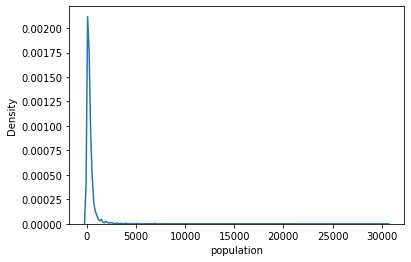

In [ ]:
sns.kdeplot(data=df, x='population')

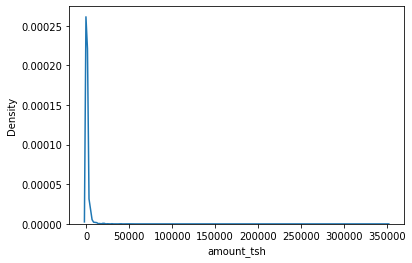

In [ ]:
sns.kdeplot(data=df, x='amount_tsh')

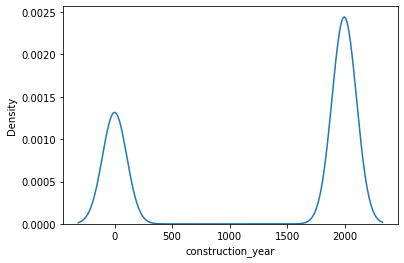

In [ ]:
sns.kdeplot(data=df, x='construction_year')

## Mutual Information

In [ ]:
X = train_data.copy()
y, _ = train_labels.status_group.factorize()

# Label encoding for categoricals
for colname in X.select_dtypes('object'):
  X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
# id
discrete_features[0] = False
# wpt_name
discrete_features[8] = False

In [ ]:
discrete_features

id                       False
amount_tsh               False
date_recorded             True
funder                    True
gps_height                True
installer                 True
longitude                False
latitude                 False
wpt_name                 False
num_private               True
basin                     True
subvillage                True
region                    True
region_code               True
district_code             True
lga                       True
ward                      True
population                True
public_meeting            True
recorded_by               True
scheme_management         True
scheme_name               True
permit                    True
construction_year         True
extraction_type           True
extraction_type_group     True
extraction_type_class     True
management                True
management_group          True
payment                   True
payment_type              True
water_quality             True
quality_

In [ ]:
X['public_meeting'].value_counts()

 0    51011
 1     5055
-1     3334
Name: public_meeting, dtype: int64

In [ ]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,0,0,1390,0,34.938093,-9.856322,0,0,0,0,0,11,5,0,0,109,0,0,0,0,0,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8776,0.0,1,1,1399,1,34.698766,-2.147466,1,0,1,1,1,20,2,1,1,280,-1,0,1,-1,1,2010,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0
2,34310,25.0,2,2,686,2,37.460664,-3.821329,2,0,2,2,2,21,4,2,2,250,0,0,0,1,1,2009,0,0,0,0,0,2,2,0,0,0,0,2,2,1,1,0
3,67743,0.0,3,3,263,3,38.486161,-11.155298,3,0,3,3,3,90,63,3,3,58,0,0,0,-1,1,1986,1,1,1,0,0,1,1,0,0,2,2,3,3,0,1,0
4,19728,0.0,4,4,0,4,31.130847,-1.825359,4,0,1,4,4,18,1,4,4,0,0,0,-1,-1,1,0,0,0,0,2,1,1,1,0,0,3,3,1,1,1,0,0


In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores


In [ ]:
y.shape

(59400,)

In [ ]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

subvillage               4.438987e-01
installer                1.326488e-01
quantity                 1.046259e-01
waterpoint_type          6.399001e-02
latitude                 6.070086e-02
waterpoint_type_group    5.252777e-02
region                   3.976719e-02
construction_year        3.516408e-02
source                   2.177114e-02
management               1.846408e-02
basin                    1.600376e-02
source_class             4.588903e-03
num_private              2.431635e-03
recorded_by              7.216450e-16
Name: MI Scores, dtype: float64

In [ ]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')


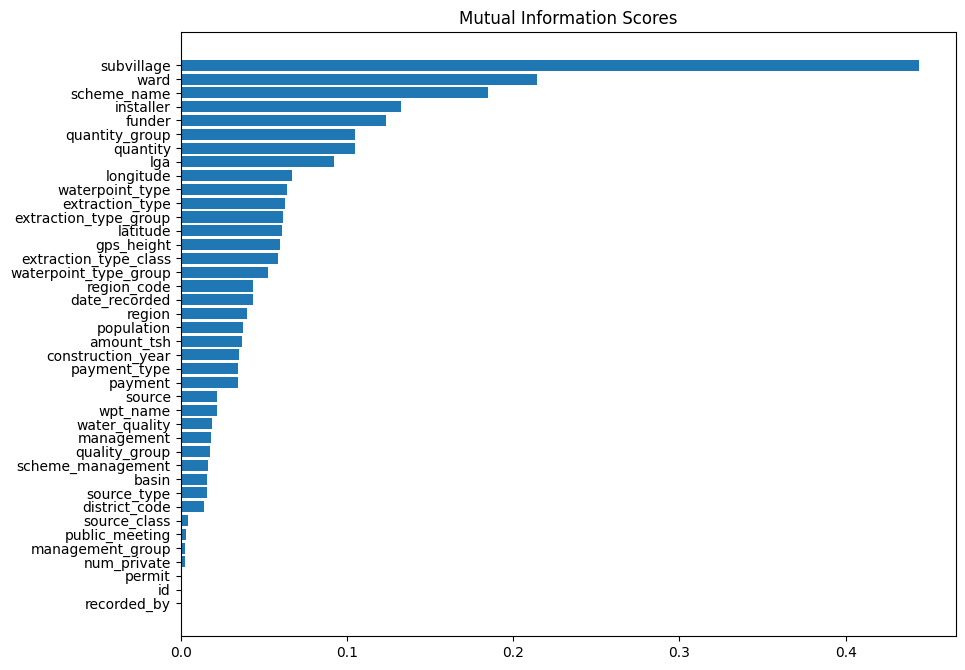

In [ ]:
plt.figure(dpi=100, figsize=(10, 8))
plot_mi_scores(mi_scores)

## Preprocess features

In [ ]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [ ]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [ ]:
unimportant_features = [
  'wpt_name', 'num_private', 'recorded_by', 'scheme_management', 'scheme_name',
  'installer', 'funder', 'ward', 'permit'
]

duplicate_features = ['payment', 'quantity']

similar_features = [
  'extraction_type', 'extraction_type_group', 'waterpoint_type_group', 'quality_group',
  'source_type', 'source_class'
]

In [ ]:
df.drop(
    unimportant_features + duplicate_features + similar_features, 
    axis=1, 
    inplace=True
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   subvillage             59029 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  construction_year      59400 non-null  int64  
 15  ex

gps_height

In [ ]:
df['gps_height'].mean()

668.297239057239

In [ ]:
(df['gps_height'] == 0).sum()

20438

In [ ]:
df['gps_height'].replace(0, np.nan, inplace=True)
# df['amount_tsh'].replace(0, np.nan, inplace=True)
df['gps_height'].isna().sum()

20438

In [ ]:
df['gps_height'].fillna(df.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
df['gps_height'].fillna(df.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
df['gps_height'].fillna(df.groupby(['district_code'])['gps_height'].transform('mean'), inplace=True)
df['gps_height'].fillna(df['gps_height'].mean(), inplace=True)

In [ ]:
df['gps_height'].value_counts().sum()

59400

population

In [ ]:
(df['population'] < 2).sum()

28406

In [ ]:
df.loc[df['population'] < 2, 'population'] = np.nan
df['population'].isna().sum()

28406

In [ ]:
df['population'].fillna(df.groupby(['lga'])['population'].transform('mean'), inplace=True)
df['population'].fillna(df.groupby(['region_code'])['population'].transform('mean'), inplace=True)
df['population'].fillna(df.groupby(['district_code'])['population'].transform('mean'), inplace=True)
df['population'].fillna(df['population'].mean(), inplace=True)

In [ ]:
df['population'].isna().sum()

0

longitude & latitude

In [ ]:
((df['longitude'] < 29) | (df['longitude'] > 41)).sum()

1812

In [ ]:
df.loc[((df['longitude'] < 29) | (df['longitude'] > 41)), 'longitude'] = np.nan

In [ ]:
df['longitude'].fillna(df.groupby(['lga'])['longitude'].transform('mean'), inplace=True)
df['longitude'].fillna(df.groupby(['region_code'])['longitude'].transform('mean'), inplace=True)
df['longitude'].fillna(df.groupby(['district_code'])['longitude'].transform('mean'), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [ ]:
((df['latitude'] < -13) | (df['latitude'] > 1)).sum()

0

In [ ]:
# df.loc[((df['latitude'] < -13) | (df['latitude'] > 1)), 'latitude'] = np.nan

construction_year

In [ ]:
(df['construction_year'] < 1900).sum()

20709

In [ ]:
df.loc[(df['construction_year'] < 1900), 'construction_year'] = np.nan

In [ ]:
df['construction_year'].fillna(df.groupby(['lga'])['construction_year'].transform('median'), inplace=True)
df['construction_year'].fillna(df.groupby(['region_code'])['construction_year'].transform('median'), inplace=True)
df['construction_year'].fillna(df.groupby(['district_code'])['construction_year'].transform('median'), inplace=True)
df['construction_year'].fillna(df['construction_year'].median(), inplace=True)

In [ ]:
df['construction_year'].isna().sum()

0

date_recorded

In [ ]:
df['year_recorded'] = pd.to_datetime(df['date_recorded']).dt.year

In [ ]:
df['year_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

public_meeting

In [ ]:
df.groupby(['lga', 'public_meeting']).size()

lga           public_meeting
Arusha Rural  False               44
              True              1204
Arusha Urban  False               44
              True                19
Babati        False                1
                                ... 
Ulanga        True               637
Urambo        False                5
              True               368
Uyui          False                1
              True               301
Length: 218, dtype: int64

In [ ]:
df['public_meeting'].fillna(df.groupby(['lga'])['public_meeting'].transform('max'), inplace=True)

In [ ]:
df['public_meeting'].isna().sum()

0

remove unwanted features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  float64
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   subvillage             59029 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  population             59400 non-null  float64
 13  public_meeting         59400 non-null  bool   
 14  construction_year      59400 non-null  float64
 15  ex

In [ ]:
removable_features = [
  'lga', 'management', 'management_group', 'date_recorded', 'subvillage',
  'region_code', 'amount_tsh'
]
# 'public_meeting'

In [ ]:
df.drop(removable_features, axis=1, inplace=True)

In [ ]:
processed_train_df = df.copy()

In [ ]:
processed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   population             59400 non-null  float64
 8   public_meeting         59400 non-null  bool   
 9   construction_year      59400 non-null  float64
 10  extraction_type_class  59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  water_quality          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source                 59400 non-null  object 
 15  wa

## Inspect Test set

In [ ]:
test_data = pd.read_csv(test_values_csv)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [ ]:
test_data['gps_height'].value_counts()

 0       5211
-19        18
 1294      18
 1343      18
 1283      17
         ... 
 722        1
 698        1
 2126       1
 674        1
 2023       1
Name: gps_height, Length: 2157, dtype: int64

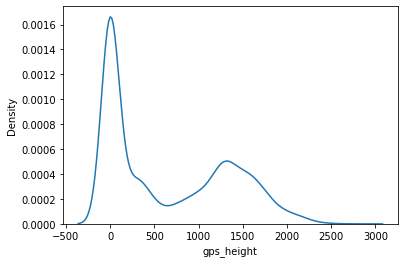

In [ ]:
sns.kdeplot(data=test_data, x='gps_height')

In [ ]:
test_data['population'].value_counts()

0       5453
1       1757
150      436
200      430
250      406
        ... 
244        1
252        1
284        1
2365       1
7000       1
Name: population, Length: 637, dtype: int64

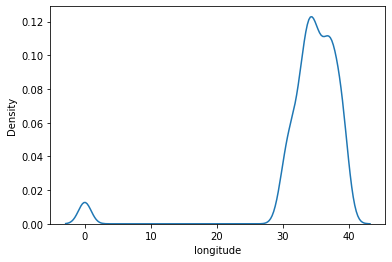

In [ ]:
sns.kdeplot(data=test_data, x='longitude')

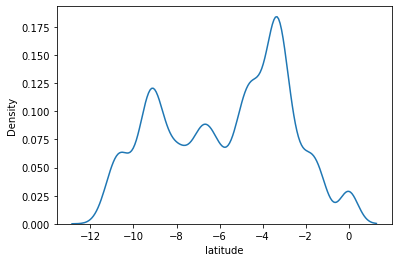

In [ ]:
sns.kdeplot(data=test_data, x='latitude')

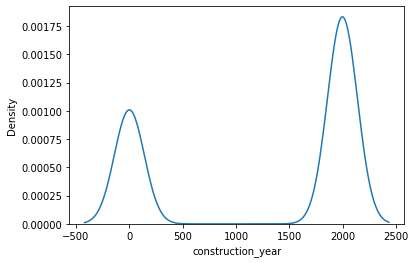

In [ ]:
sns.kdeplot(data=test_data, x='construction_year')

In [ ]:
tr = train_data['lga'].unique().tolist()
for ts in test_data['lga'].unique().tolist():
  if ts not in tr:
    print("not found", ts)

## Preprocess Test Set

In [ ]:
test_df = test_data.copy()
train_df = train_data.copy()

In [ ]:
test_df.drop(
    unimportant_features + duplicate_features + similar_features, 
    axis=1, 
    inplace=True
)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   basin                  14850 non-null  object 
 7   subvillage             14751 non-null  object 
 8   region                 14850 non-null  object 
 9   region_code            14850 non-null  int64  
 10  district_code          14850 non-null  int64  
 11  lga                    14850 non-null  object 
 12  population             14850 non-null  int64  
 13  public_meeting         14029 non-null  object 
 14  construction_year      14850 non-null  int64  
 15  ex

population

In [ ]:
train_df['population'] = train_df['population'].astype('float64')

In [ ]:
df_new = train_df.loc[train_df['population'] > 1]

In [ ]:
overall_population_mean = df_new['population'].mean()

In [ ]:
lga_population_mean = df_new.groupby(['lga'])['population'].mean()
region_code_population_mean = df_new.groupby(['region_code'])['population'].mean()
district_code_population_mean = df_new.groupby(['district_code'])['population'].mean()

In [ ]:
region_code_population_mean.index

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19, 20,
            21, 24, 40, 60, 80, 90, 99],
           dtype='int64', name='region_code')

In [ ]:
test_df['population'] = test_df.population.astype('float64')

In [ ]:
for index, row in test_df.iterrows():
  if row['population'] < 2:
    if row['lga'] in lga_population_mean.index:
      test_df.at[index, 'population'] = lga_population_mean[row['lga']]
    elif row['region_code'] in region_code_population_mean.index:
      test_df.at[index, 'population'] = region_code_population_mean[row['region_code']]
    elif row['district_code'] in district_code_population_mean.index:
      test_df.at[index, 'population'] = district_code_population_mean[row['district_code']]
    else:
      test_df.at[index, 'population'] = overall_population_mean

In [ ]:
test_df.groupby(['region'])['population'].mean()

region
Arusha           285.567234
Dar es Salaam    231.620566
Dodoma           323.493036
Iringa           185.409317
Kagera           400.750000
Kigoma           552.646702
Kilimanjaro      172.047773
Lindi            412.815714
Manyara          413.860021
Mara             568.309284
Mbeya            316.972299
Morogoro         306.100421
Mtwara           339.921083
Mwanza           582.615200
Pwani            595.802935
Rukwa            502.592957
Ruvuma           424.923474
Shinyanga        460.661006
Singida          380.459156
Tabora           331.571935
Tanga            377.107338
Name: population, dtype: float64

---

In [ ]:
def fill_missing_values_based_on_location(test_df, train_df, feature, type='mean'):
  if type == 'mean':
    lga_wise = train_df.groupby(['lga'])[feature].mean()
    region_code_wise = train_df.groupby(['region_code'])[feature].mean()
    district_code_wise = train_df.groupby(['district_code'])[feature].mean()
    overall = train_df[feature].mean()
  elif type == 'median':
    lga_wise = train_df.groupby(['lga'])[feature].median()
    region_code_wise = train_df.groupby(['region_code'])[feature].median()
    district_code_wise = train_df.groupby(['district_code'])[feature].median()
    overall = train_df[feature].median()
  elif type == 'max':
    lga_wise = train_df.groupby(['lga'])[feature].max()
    region_code_wise = train_df.groupby(['region_code'])[feature].max()
    district_code_wise = train_df.groupby(['district_code'])[feature].max()
    overall = train_df[feature].max()
  else:
    raise ValueError("'Invalid type!!! type should be one of ['mean', 'median', 'max']")

  for index, row in test_df.iterrows():
    if np.isnan(row[feature]):
      if row['lga'] in lga_wise.index:
        test_df.at[index, feature] = lga_wise[row['lga']]
      elif row['region_code'] in region_code_wise.index:
        test_df.at[index, feature] = region_code_wise[row['region_code']]
      elif row['district_code'] in district_code_wise.index:
        test_df.at[index, feature] = district_code_wise[row['district_code']]
      else:
        test_df.at[index, feature] = overall
  return test_df

gps_height

In [ ]:
(test_df['gps_height'] == 0).sum()

5211

In [ ]:
test_df.loc[test_df['gps_height'] == 0, 'gps_height'] = np.nan

In [ ]:
train_df['gps_height'] = train_df['gps_height'].astype('float64')
test_df['gps_height'] = test_df['gps_height'].astype('float64')

In [ ]:
df_new = train_df.loc[train_df['gps_height'] != 0]
test_df = fill_missing_values_based_on_location(test_df, df_new, 'gps_height', type='mean')

In [ ]:
test_df['gps_height'].value_counts()

 1350.981707    1272
 23.000000       863
 1199.643052     643
 1262.733170     476
 998.432498      441
                ... 
 2214.000000       1
 656.000000        1
 1120.000000       1
-57.000000         1
 2055.000000       1
Name: gps_height, Length: 2176, dtype: int64

longitude & latitude

In [ ]:
((test_df['longitude'] < 29) | (test_df['longitude'] > 41)).sum()

457

In [ ]:
test_df.loc[((test_df['longitude'] < 29) | (test_df['longitude'] > 41)), 'longitude'] = np.nan

In [ ]:
df_new = train_df.loc[((train_df['longitude'] >= 29) & (train_df['longitude'] <= 41))]
test_df = fill_missing_values_based_on_location(test_df, df_new, 'longitude', type='mean')

construction_year

In [ ]:
(test_df['construction_year'] < 1900).sum()

5260

In [ ]:
test_df.loc[(test_df['construction_year'] < 1900), 'construction_year'] = np.nan

In [ ]:
train_df['construction_year'] = train_df['construction_year'].astype('float64')
test_df['construction_year'] = test_df['construction_year'].astype('float64')

In [ ]:
df_new = train_df.loc[train_df['construction_year'] >= 1900]
test_df = fill_missing_values_based_on_location(test_df, df_new, 'construction_year', type='median')

date_recorded

In [ ]:
test_df['year_recorded'] = pd.to_datetime(test_df['date_recorded']).dt.year

In [ ]:
test_df['year_recorded'].value_counts()

2011    7234
2013    5939
2012    1665
2004      11
2001       1
Name: year_recorded, dtype: int64

In [ ]:
test_df['year_recorded'].isna().sum()

0

public_meeting

In [ ]:
train_df.groupby(['lga'])['public_meeting'].max()

lga
Arusha Rural    True
Arusha Urban    True
Babati          True
Bagamoyo        True
Bahi            True
                ... 
Tunduru         True
Ukerewe         True
Ulanga          True
Urambo          True
Uyui            True
Name: public_meeting, Length: 125, dtype: bool

In [ ]:
df_new = train_df.loc[((train_df['public_meeting'] == True) | (train_df['public_meeting'] == False))]
test_df = fill_missing_values_based_on_location(test_df, df_new, 'public_meeting', type='max')

In [ ]:
test_df['public_meeting'].isna().sum()

0

remove unwanted features

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   gps_height             14850 non-null  float64
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   basin                  14850 non-null  object 
 7   subvillage             14751 non-null  object 
 8   region                 14850 non-null  object 
 9   region_code            14850 non-null  int64  
 10  district_code          14850 non-null  int64  
 11  lga                    14850 non-null  object 
 12  population             14850 non-null  float64
 13  public_meeting         14850 non-null  object 
 14  construction_year      14850 non-null  float64
 15  ex

In [ ]:
test_df.drop(removable_features, axis=1, inplace=True)

In [ ]:
test_df['public_meeting'] = test_df['public_meeting'].astype('bool')

In [ ]:
processed_test_df = test_df.copy()

In [ ]:
processed_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   gps_height             14850 non-null  float64
 2   longitude              14850 non-null  float64
 3   latitude               14850 non-null  float64
 4   basin                  14850 non-null  object 
 5   region                 14850 non-null  object 
 6   district_code          14850 non-null  int64  
 7   population             14850 non-null  float64
 8   public_meeting         14850 non-null  bool   
 9   construction_year      14850 non-null  float64
 10  extraction_type_class  14850 non-null  object 
 11  payment_type           14850 non-null  object 
 12  water_quality          14850 non-null  object 
 13  quantity_group         14850 non-null  object 
 14  source                 14850 non-null  object 
 15  wa

## Concat train & test sets

* **processed_train_df**: train set after pre-processing
* **processed_test_df**: test set after pre-*processing*

In [ ]:
label = processed_train_df.pop('status_group')

In [ ]:
processed_train_df['train'] = 1
processed_test_df['train'] = 0

In [ ]:
concat_df = pd.concat([processed_train_df, processed_test_df])

In [ ]:
concat_df['public_meeting'] = concat_df['public_meeting'].astype('int64')

In [ ]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   gps_height             74250 non-null  float64
 2   longitude              74250 non-null  float64
 3   latitude               74250 non-null  float64
 4   basin                  74250 non-null  object 
 5   region                 74250 non-null  object 
 6   district_code          74250 non-null  int64  
 7   population             74250 non-null  float64
 8   public_meeting         74250 non-null  int64  
 9   construction_year      74250 non-null  float64
 10  extraction_type_class  74250 non-null  object 
 11  payment_type           74250 non-null  object 
 12  water_quality          74250 non-null  object 
 13  quantity_group         74250 non-null  object 
 14  source                 74250 non-null  object 
 15  wa

In [ ]:
label_dict = {'functional': 0, 'functional needs repair': 1, 'non functional': 2}

In [ ]:
label_encoded = {}
for index, value in label.items():
  label_encoded[index] = label_dict[value]

y = pd.Series(label_encoded)

## Random Encoding

pandas `factorize()` function is used

In [ ]:
# X = concat_df.copy()

In [ ]:
# X.drop(['status_group'], axis=1, inplace=True)
# y, _ = train_labels['status_group'].factorize()

In [ ]:
# Label encoding for categoricals
for colname in concat_df.select_dtypes('object'):
  concat_df[colname], _ = concat_df[colname].factorize()

## Frequency Encoding

Interested features

* region
* payment_type
* water_quality
* extraction_type_class
* waterpoint_type
* basin
* source
* quantity_group

In [ ]:
categorical_features = [
  'region', 'payment_type', 'water_quality', 'extraction_type_class',
  'waterpoint_type', 'basin', 'source', 'quantity_group'
]

In [ ]:
concat_df.info()

In [ ]:
if 'district_code' in concat_df.columns:
  concat_df['district_code'] = concat_df['district_code'].apply(str)

if 'region_code' in concat_df.columns:
  concat_df['region_code'] = concat_df['region_code'].apply(str)

*   **df**: train set
*   **concat_df**: train and test set concatenated

In [ ]:
for feature in categorical_features:
  feature_freq_encoded = df[feature].value_counts().index.tolist()
  encoded_data = []
  for index, row in concat_df.iterrows():
    encoded_data.append(feature_freq_encoded.index(row[feature]))
  concat_df[f'{feature}_id'] = encoded_data

---

In [ ]:
region_freq_encoded = df['region'].value_counts().index.tolist()

In [ ]:
payment_type_freq_encoded = df['payment_type'].value_counts().index.tolist()
water_quality_freq_encoded = df['water_quality'].value_counts().index.tolist()
extraction_type_class_freq_encoded = df['extraction_type_class'].value_counts().index.tolist()
waterpoint_type_freq_encoded = df['waterpoint_type'].value_counts().index.tolist()
basin_freq_encoded = df['basin'].value_counts().index.tolist()
source_freq_encoded = df['source'].value_counts().index.tolist()
quantity_group_freq_encoded = df['quantity_group'].value_counts().index.tolist()

In [ ]:
freq = df.groupby(['region']).size() / len(df)

In [ ]:
df.loc[:, 'region_id'] = df['region'].map(freq)

In [ ]:
def encode_by_freq(df, feature):
  freq = df.groupby([feature]).size() / len(df)
  df.loc[:, f'{feature}_id'] = df[feature].map(freq)
  return df

## Target Encoding

Interested features

* region
* payment_type
* water_quality
* extraction_type_class
* waterpoint_type
* basin
* source
* quantity_group

In [ ]:
def get_keys_sorted_by_values(d, descending=True):
  # new_d = dict(sorted(d.items(), key=lambda item: item[1] * factor))
  return [k for k, v in sorted(d.items(), key=lambda item: item[1], reverse=descending)]

In [ ]:
def get_target_encoding(df, feature):
  unique_values = df[feature].unique()
  group_df = df.groupby([feature, 'status_group']).size()
  encodings_dict = {}

  for value in unique_values:
    total_count = group_df.at[value].sum()
    functional_count = group_df.at[value]['functional']
    encodings_dict[value] = functional_count / total_count
  
  return get_keys_sorted_by_values(encodings_dict)
  # return encodings_dict

In [ ]:
def get_encoded_data(df, feature):
  target_encoded_feature = get_target_encoding(df, feature)
  encoded = []
  for index, row in df.iterrows():
    encoded.append(target_encoded_feature.index(row[feature]))
  return encoded, target_encoded_feature

In [ ]:
categorical_features = [
  'region', 'payment_type', 'water_quality', 'extraction_type_class',
  'waterpoint_type', 'basin', 'source', 'quantity_group'
]

*   **df**: train set
*   **concat_df**: train and test set concatenated

In [ ]:
for feature in categorical_features:
  feature_target_encoded = get_target_encoding(df, feature)
  encoded = []
  for index, row in concat_df.iterrows():
    encoded.append(feature_target_encoded.index(row[feature]))
  concat_df[f'{feature}_id'] = encoded

---
*run the following cells to seperately encode each feature*

Target encoding: Regions

In [ ]:
regions = df['region'].unique()

In [ ]:
df_new = df.groupby(['region', 'status_group']).size()

In [ ]:
df_new['Tanga']['functional']

1436

In [ ]:
regions_dict = {}

for region in regions:
  total_count = df_new.at[region].sum()
  functional_count = df_new.at[region]['functional']
  regions_dict[region] = functional_count / total_count


In [ ]:
regions_dict['Arusha']

0.6847761194029851

In [ ]:
regions_target_encoded = get_keys_sorted_by_values(regions_dict)

In [ ]:
regions_target_encoded.index('Mtwara')

19

In [ ]:
region_ids = []
for index, row in df.iterrows():
  region_ids.append(regions_target_encoded.index(row['region']))

In [ ]:
df['region'] = region_ids

In [ ]:
df.shape

(59400, 42)

Target encoding: payment_type

In [ ]:
payment_type_target_encoded = get_target_encoding(df, feature='payment_type')

In [ ]:
payment_type_ids, payment_type_target_encoded = get_encoded_data(df, feature='payment_type')
len(payment_type_ids)

In [ ]:
df['payment_type'] = payment_type_ids

target encoding: water_quality

In [ ]:
water_quality_target_encoded = get_target_encoding(df, feature='water_quality')

In [ ]:
water_quality_ids, water_quality_target_encoded = get_encoded_data(df, feature='water_quality')
print(water_quality_target_encoded)

['fluoride', 'soft', 'milky', 'salty abandoned', 'coloured', 'salty', 'fluoride abandoned', 'unknown']


In [ ]:
df['water_quality'] = water_quality_ids

target encoding: extraction_type_class

In [ ]:
extraction_type_class_target_encoded = get_target_encoding(df, feature='extraction_type_class')

In [ ]:
extraction_type_class_ids, extraction_type_class_target_encoded = get_encoded_data(df, feature='extraction_type_class')
print(extraction_type_class_target_encoded)

In [ ]:
df['extraction_type_class'] = extraction_type_class_ids

target encoding: waterpoint_type

In [ ]:
waterpoint_type_target_encoded = get_target_encoding(df, feature='waterpoint_type')

In [ ]:
waterpoint_type_ids, waterpoint_type_target_encoded = get_encoded_data(df, feature='waterpoint_type')
print(waterpoint_type_target_encoded)

In [ ]:
df['waterpoint_type'] = waterpoint_type_ids

target encoding: basin

In [ ]:
basin_target_encoded = get_target_encoding(df, feature='basin')

In [ ]:
basin_ids, basin_target_encoded = get_encoded_data(df, feature='basin')
print(basin_target_encoded)

In [ ]:
df['basin'] = basin_ids

target encoding: source

In [ ]:
source_target_encoded = get_target_encoding(df, feature='source')

In [ ]:
source_ids, source_target_encoded = get_encoded_data(df, feature='source')
print(source_target_encoded)

In [ ]:
df['source'] = source_ids

target encoding: quantity_group

In [ ]:
quantity_group_ids, quantity_group_target_encoded = get_encoded_data(df, feature='quantity_group')

In [ ]:
df['quantity_group'] = quantity_group_ids

## Train Model

uncomment and run below cell if freq. or target encoding is used

In [ ]:
# concat_df.drop(categorical_features, axis=1, inplace=True)

---

In [ ]:
X = concat_df.loc[concat_df['train'] == 1]

In [ ]:
X.drop(['id', 'train'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             59400 non-null  float64
 1   longitude              59400 non-null  float64
 2   latitude               59400 non-null  float64
 3   basin                  59400 non-null  int64  
 4   region                 59400 non-null  int64  
 5   district_code          59400 non-null  int64  
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  int64  
 8   construction_year      59400 non-null  float64
 9   extraction_type_class  59400 non-null  int64  
 10  payment_type           59400 non-null  int64  
 11  water_quality          59400 non-null  int64  
 12  quantity_group         59400 non-null  int64  
 13  source                 59400 non-null  int64  
 14  waterpoint_type        59400 non-null  int64  
 15  ye

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [ ]:
class_weight = None
# class_weight = {0: 1, 1: 2, 2: 4}

In [ ]:
model = RandomForestClassifier(n_estimators=400, class_weight=class_weight)

In [ ]:
scoring = ['precision_macro', 'recall_macro']

In [ ]:
output = cross_validate(model, X, y, cv=5, scoring=scoring)

In [ ]:
output.keys()

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro'])

In [ ]:
output['test_precision_macro']

array([0.72994403, 0.72768403, 0.7128731 , 0.71418231, 0.70984341])

In [ ]:
output['test_recall_macro']

array([0.67297037, 0.67030541, 0.66760067, 0.66063829, 0.66571309])

In [ ]:
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predict

In [ ]:
X_test = concat_df.loc[concat_df['train'] == 0]
X_test.drop(['train'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_test_id = X_test.pop('id')

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             14850 non-null  float64
 1   longitude              14850 non-null  float64
 2   latitude               14850 non-null  float64
 3   basin                  14850 non-null  int64  
 4   region                 14850 non-null  int64  
 5   district_code          14850 non-null  int64  
 6   population             14850 non-null  float64
 7   public_meeting         14850 non-null  int64  
 8   construction_year      14850 non-null  float64
 9   extraction_type_class  14850 non-null  int64  
 10  payment_type           14850 non-null  int64  
 11  water_quality          14850 non-null  int64  
 12  quantity_group         14850 non-null  int64  
 13  source                 14850 non-null  int64  
 14  waterpoint_type        14850 non-null  int64  
 15  ye

In [ ]:
inverse_label_dict = {v: k for k, v in label_dict.items()}

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred_labels = []
for v in pred:
  pred_labels.append(inverse_label_dict[v])

In [ ]:
pred_df = pd.DataFrame(pred_labels, columns=['status_group'])

In [ ]:
pred_df['id'] = X_test_id

In [ ]:
pred_df = pred_df.loc[:, ['id', 'status_group']]

In [ ]:
pred_filepath = '/content/pred_2.csv'
pred_df.to_csv(pred_filepath, index=False)

In [ ]:
!cp -r {pred_filepath} {data_folder}